https://cloud.tencent.com/developer/article/1893201

In [1]:
# 设置cell宽度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 警告
import warnings
warnings.filterwarnings('ignore')

# matplotlib
from tqdm import tqdm
from pprint import pprint
from matplotlib import pylab
from seaborn import set_style
set_style("whitegrid")
%matplotlib inline

# matplotlib 中文乱码、正负号乱码
from platform import system
os_name = system()
print(os_name)

from matplotlib import rcParams
rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
if os_name == r"Windows":
    rcParams["font.sans-serif"]=["SimHei"] #设置字体
elif os_name == r"Darwin":
    rcParams['font.family'] = 'PingFang HK'
else:
    pass


# 调整运行根目录
import os
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
#os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
print(os.getcwd()) 

# Dataframe显示格式
from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',1000)
set_option('display.max_columns',1000)
set_option('display.max_colwidth',1000)
set_option('display.float_format',lambda x : '%.4f' % x)

Windows
D:\github\xueqiu\Date20221228 绿巨柱分析


In [2]:
from matplotlib import pyplot
from mpl_finance import candlestick_ohlc
from pandas import concat
from dateutil.parser import parse

C:\Software\Miniconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [15]:
import akshare as ak
from datetime import datetime

start_date = "20181231"
end_date = datetime.now().strftime("%Y%m%d")
symbol = "000852"

raw_data = ak.stock_zh_index_hist_csindex(symbol=symbol, start_date=start_date, end_date=end_date)

In [16]:
data = raw_data.copy(deep=True)
data = data.set_index("日期")
data.sort_index(inplace=True)
data["成交量MA5"] = data["成交量"].rolling(5).mean().shift(1)
data["成交量占比MA5"] = data["成交量"] / data["成交量MA5"]
data["阴线"] = data["收盘"] < data["开盘"]
data.dropna(inplace=True)
data = data.loc[data["阴线"]].sort_values("成交量占比MA5",ascending=False)

<Figure size 1200x1000 with 0 Axes>

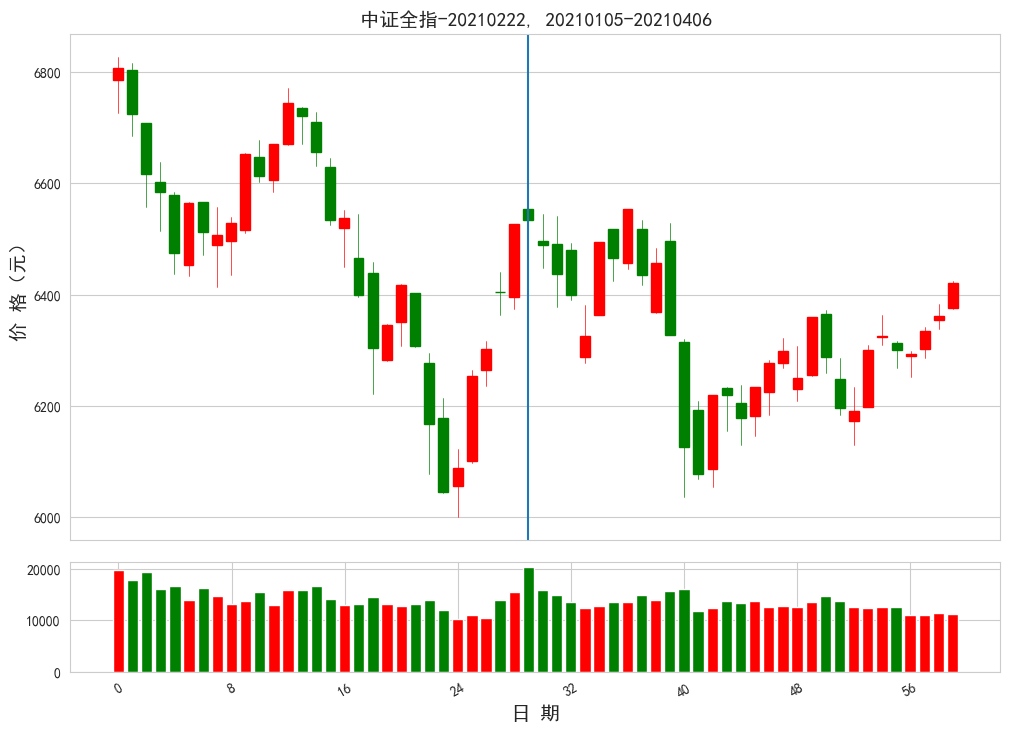

<Figure size 1200x1000 with 0 Axes>

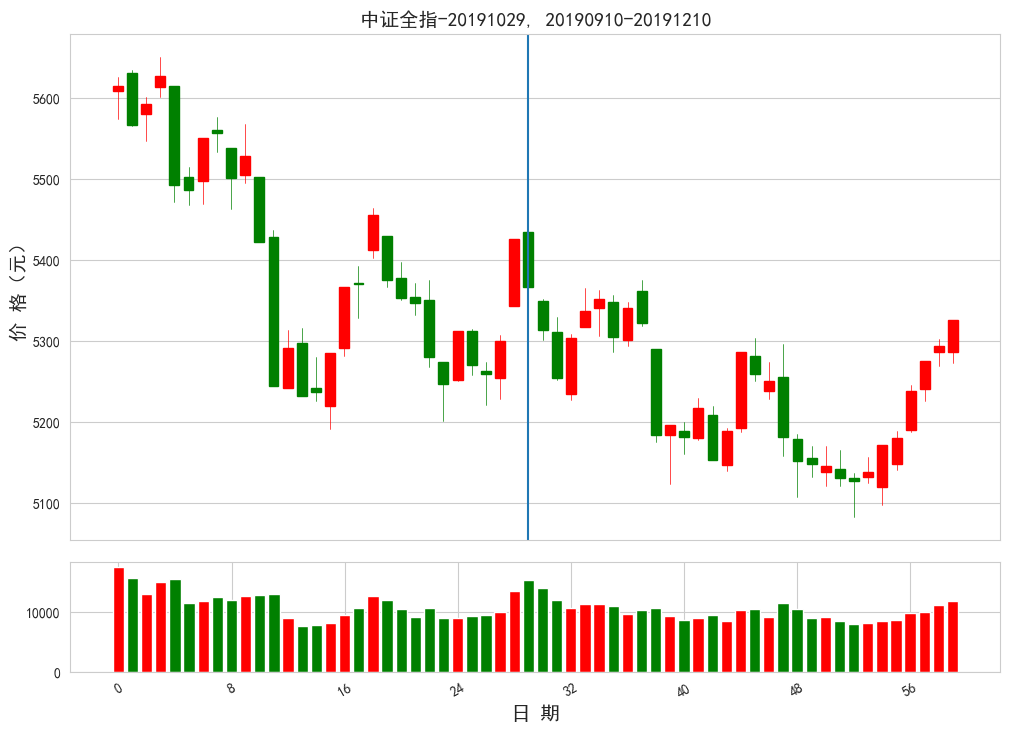

<Figure size 1200x1000 with 0 Axes>

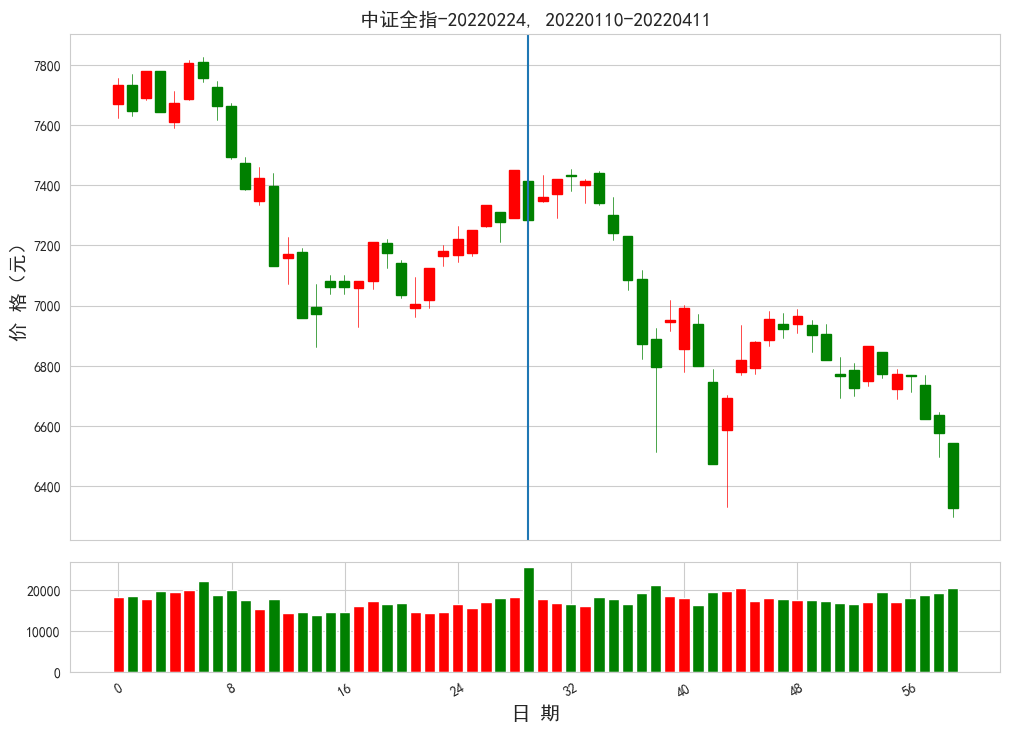

<Figure size 1200x1000 with 0 Axes>

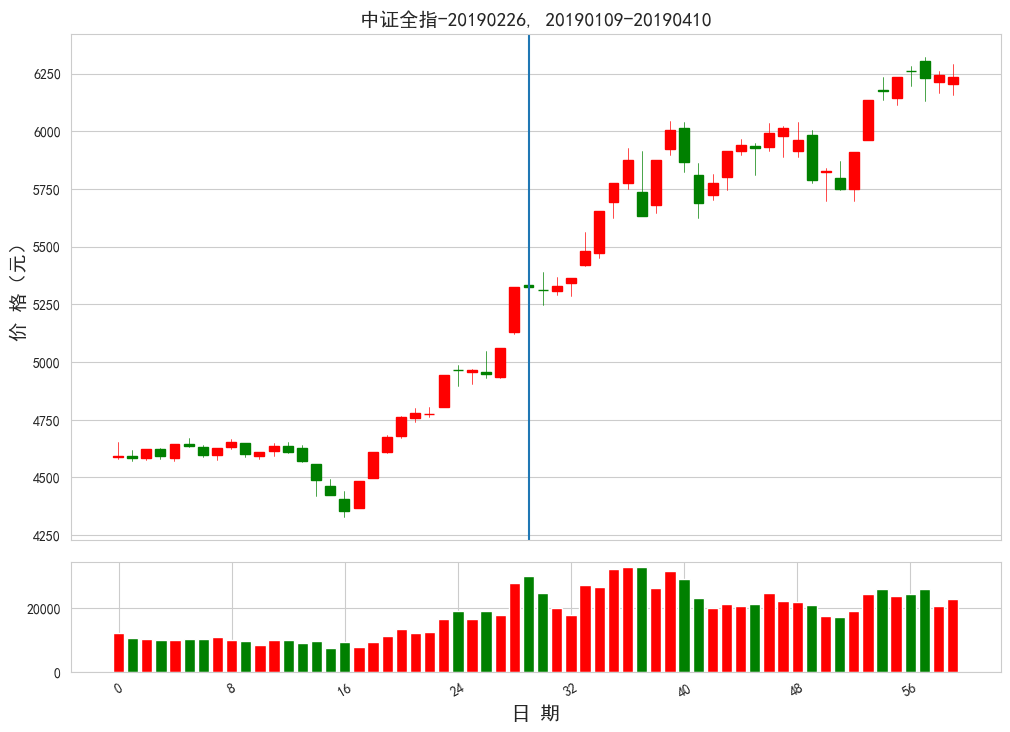

<Figure size 1200x1000 with 0 Axes>

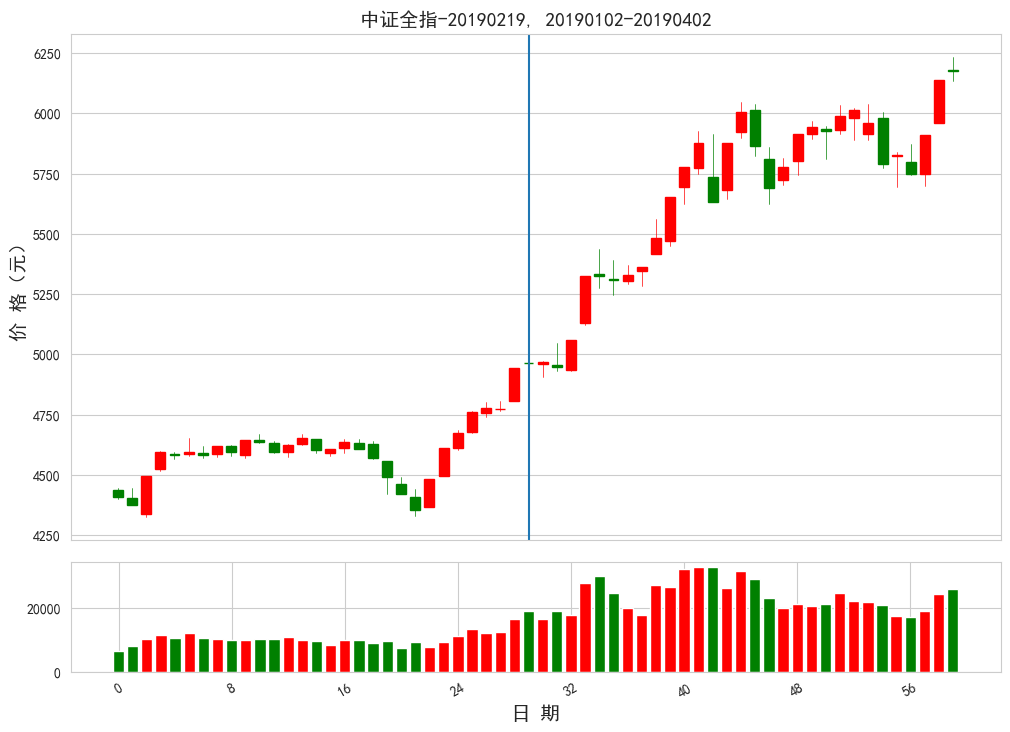

<Figure size 1200x1000 with 0 Axes>

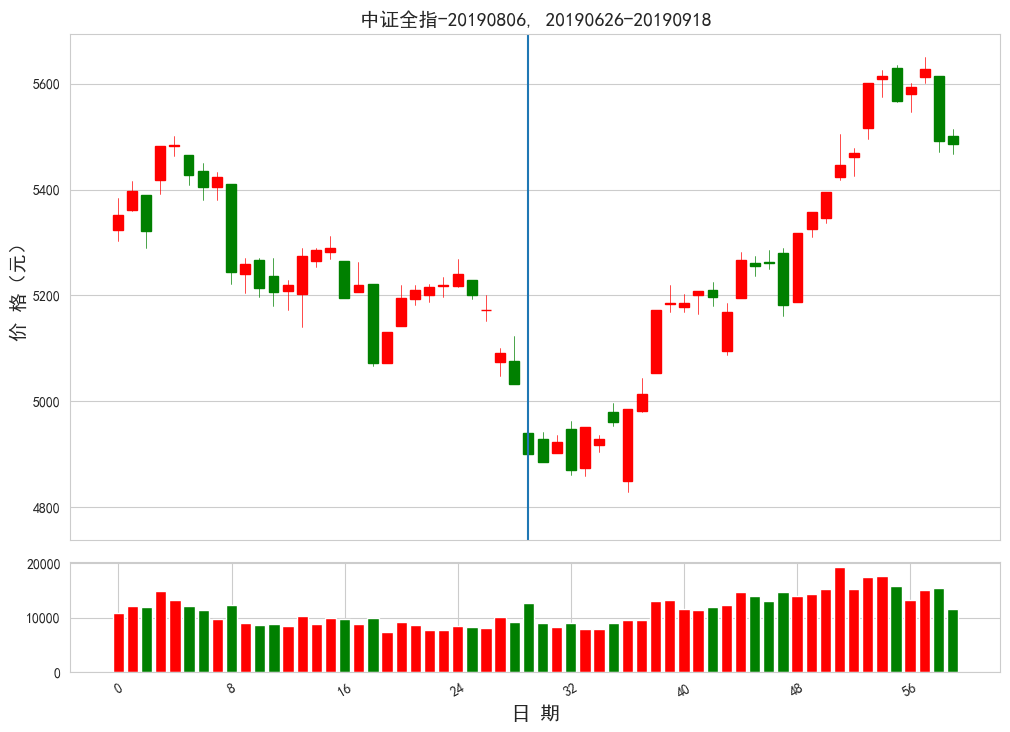

<Figure size 1200x1000 with 0 Axes>

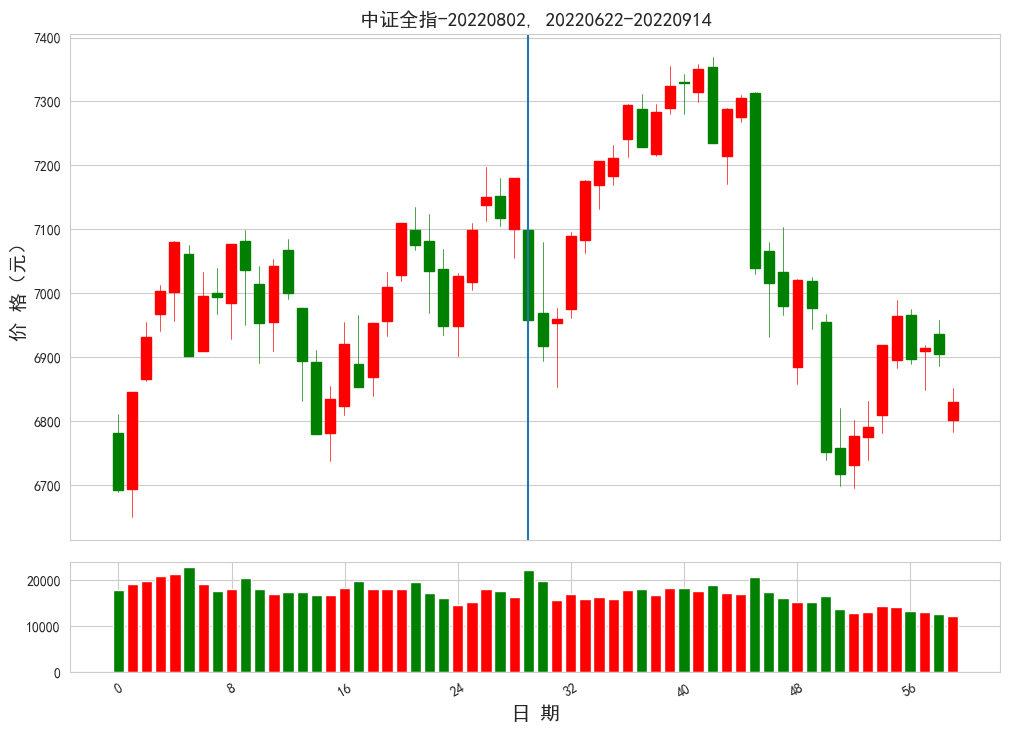

<Figure size 1200x1000 with 0 Axes>

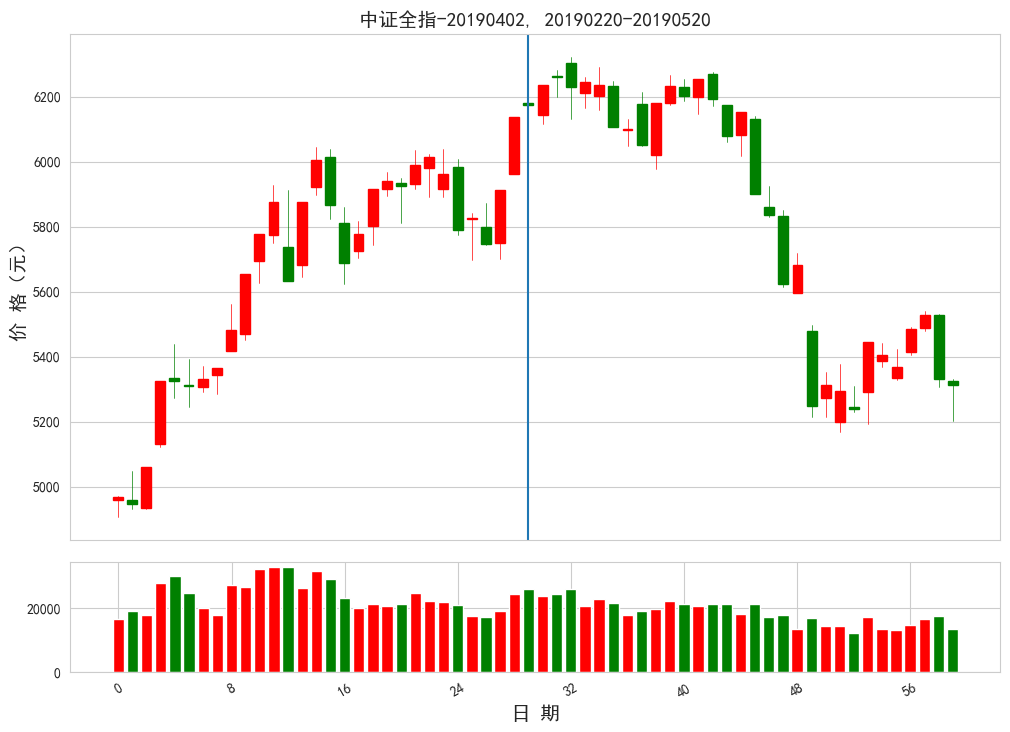

<Figure size 1200x1000 with 0 Axes>

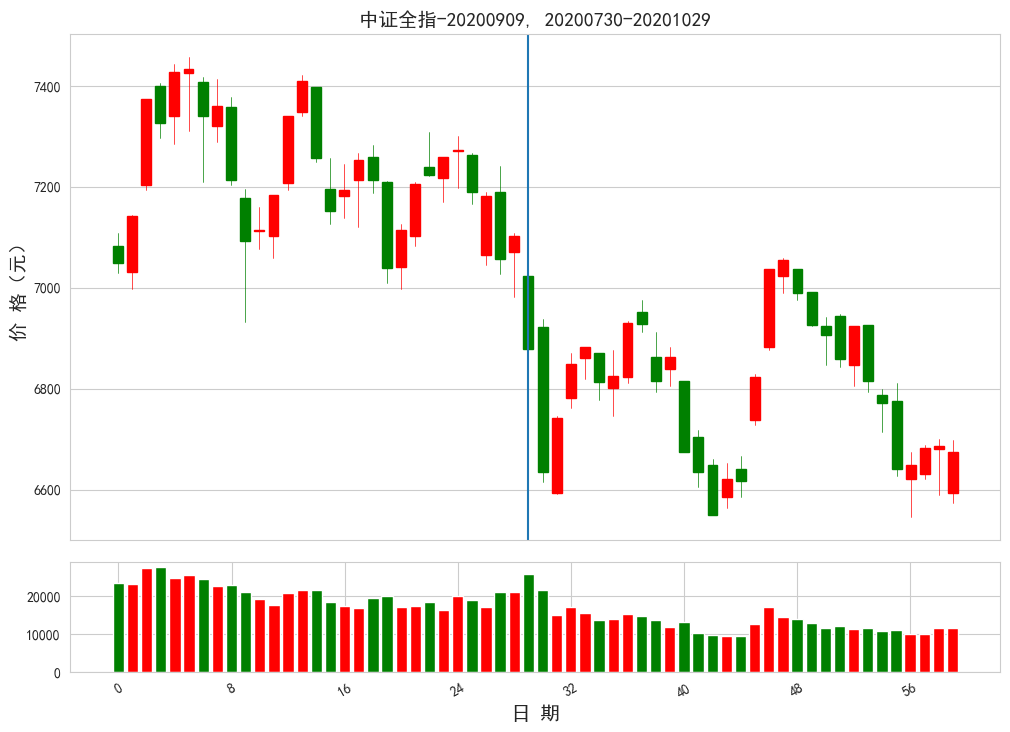

<Figure size 1200x1000 with 0 Axes>

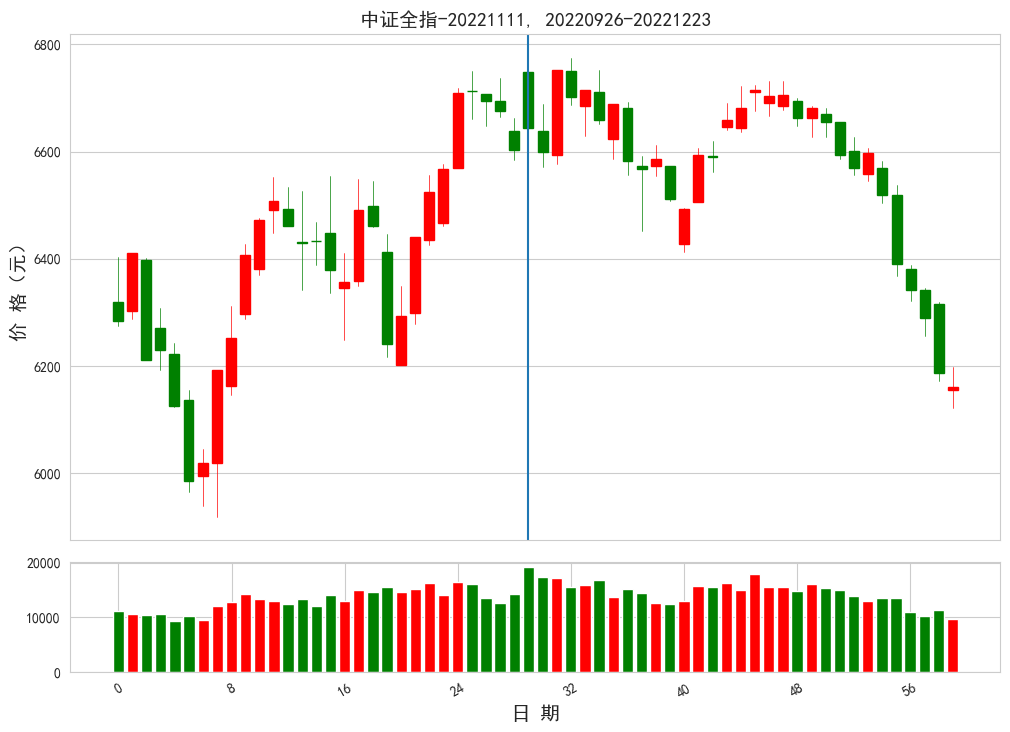

<Figure size 1200x1000 with 0 Axes>

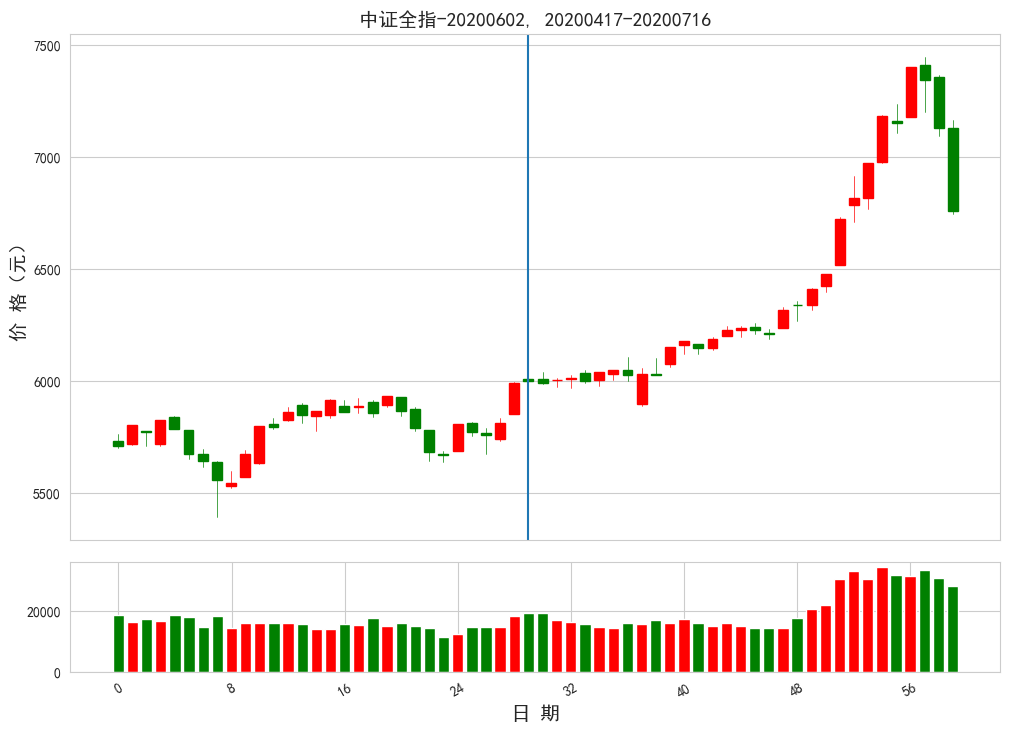

<Figure size 1200x1000 with 0 Axes>

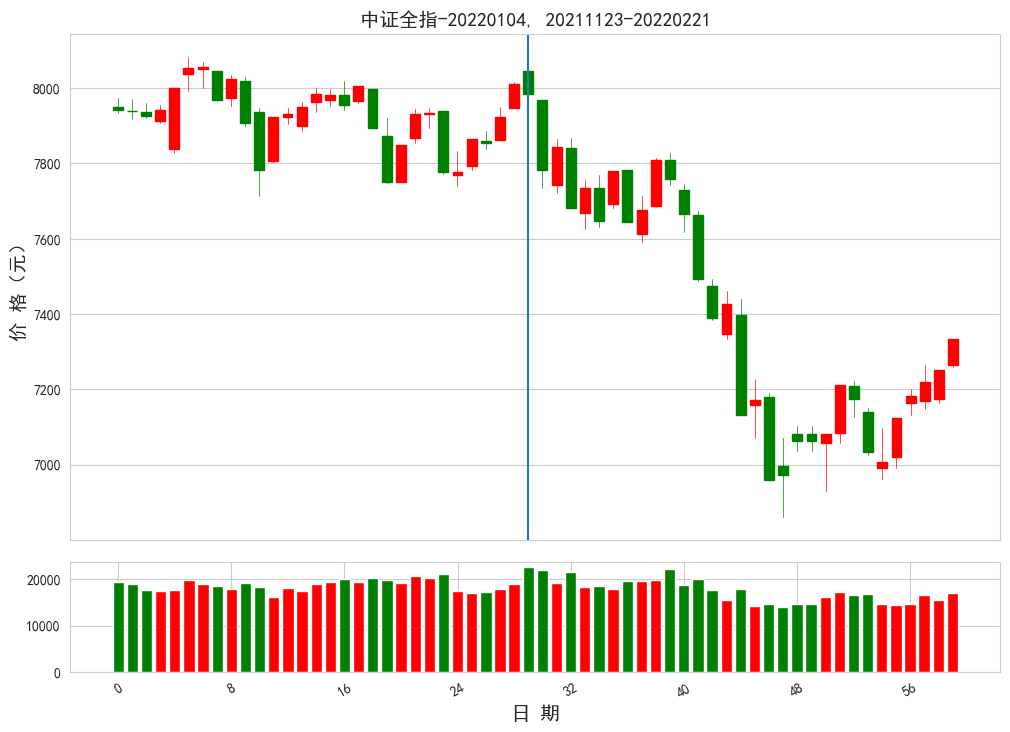

<Figure size 1200x1000 with 0 Axes>

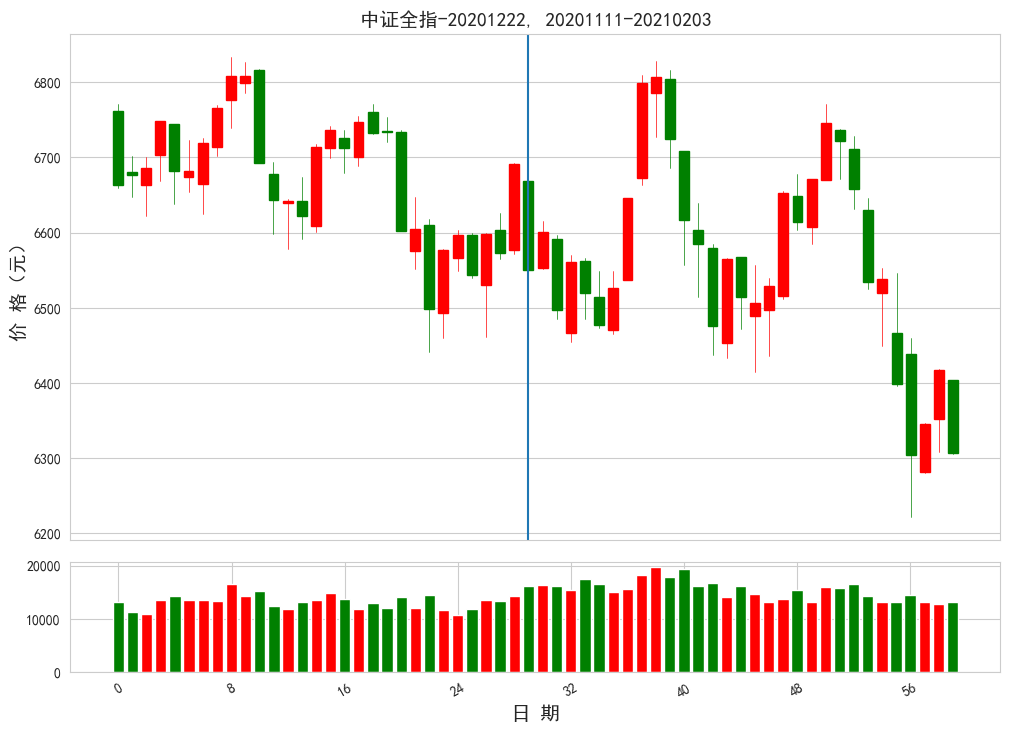

<Figure size 1200x1000 with 0 Axes>

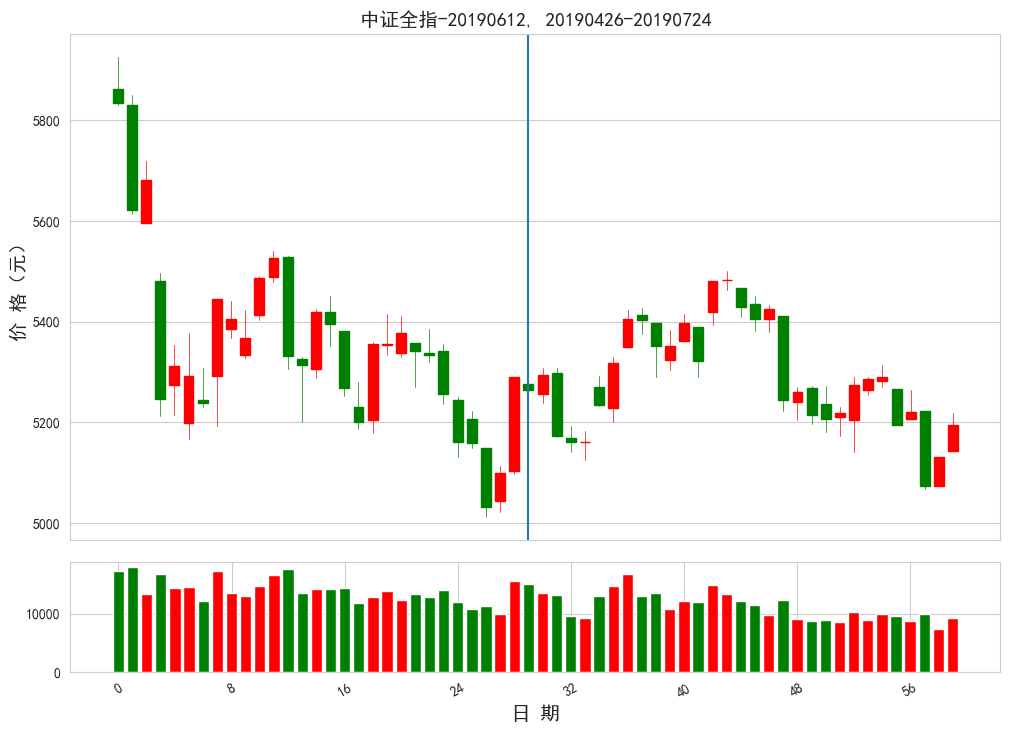

<Figure size 1200x1000 with 0 Axes>

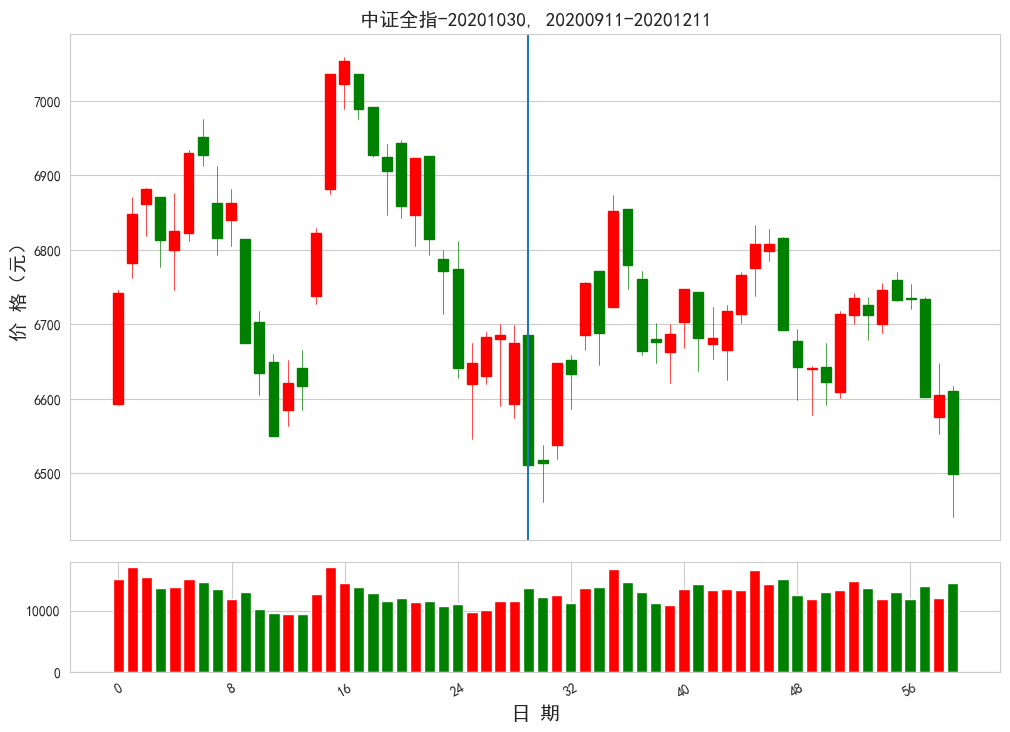

<Figure size 1200x1000 with 0 Axes>

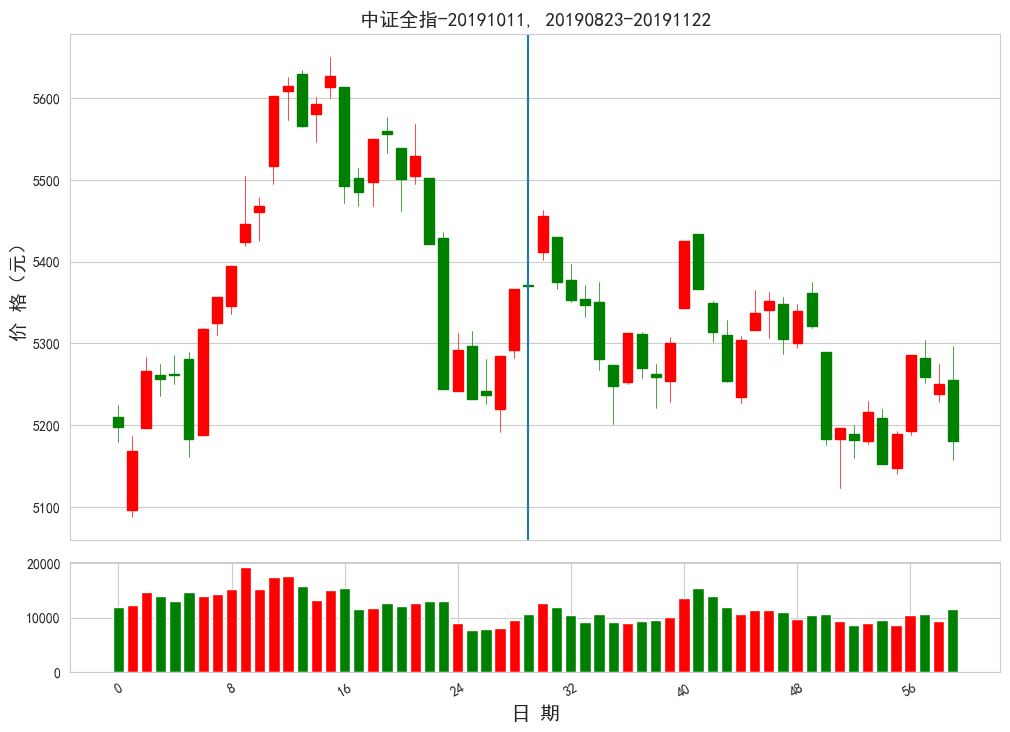

<Figure size 1200x1000 with 0 Axes>

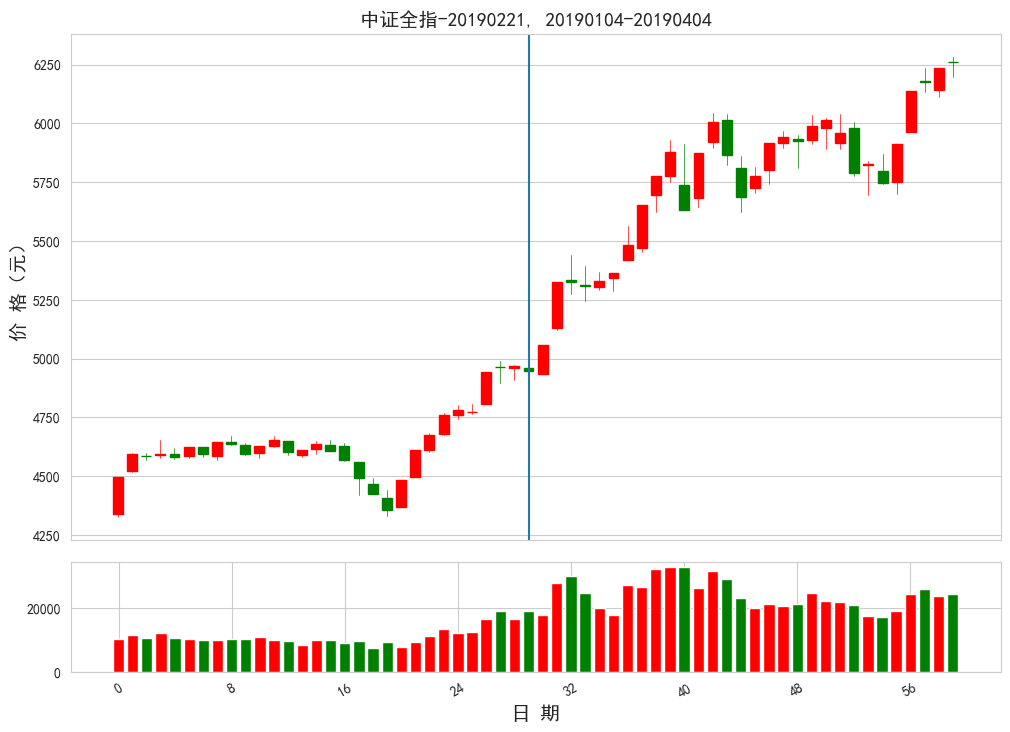

<Figure size 1200x1000 with 0 Axes>

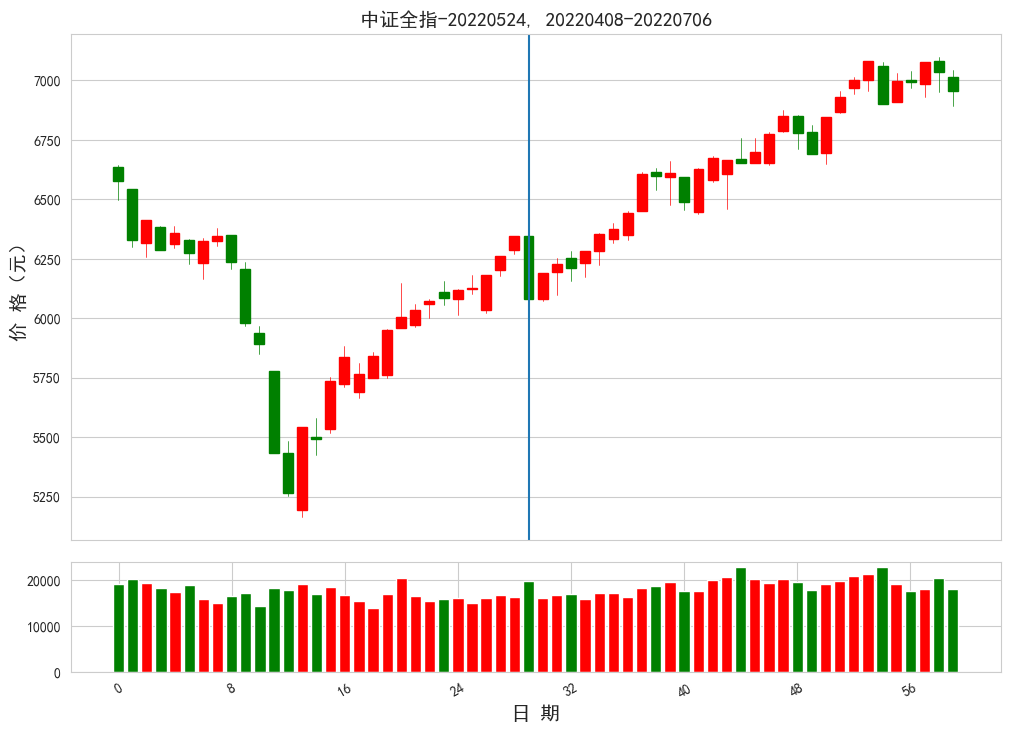

<Figure size 1200x1000 with 0 Axes>

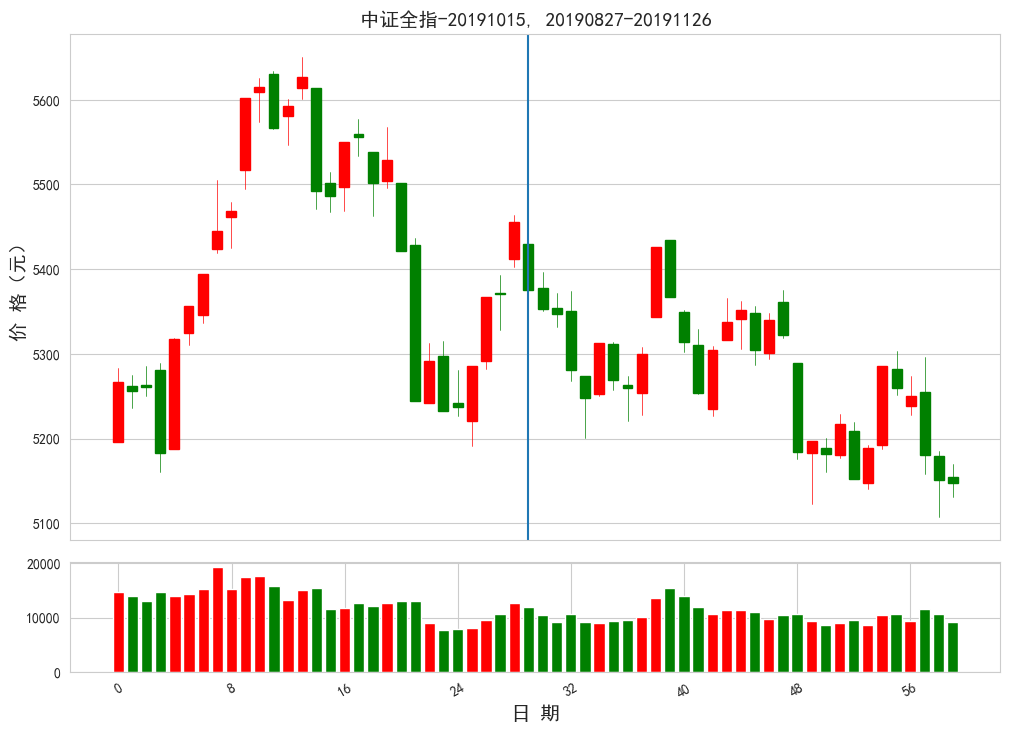

<Figure size 1200x1000 with 0 Axes>

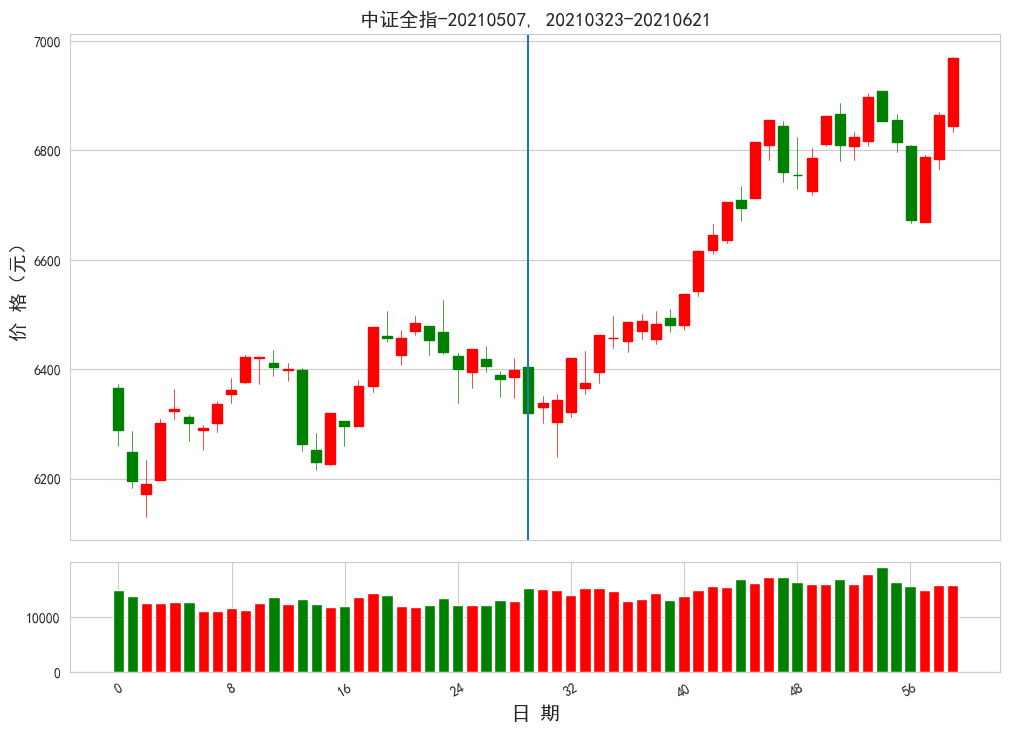

<Figure size 1200x1000 with 0 Axes>

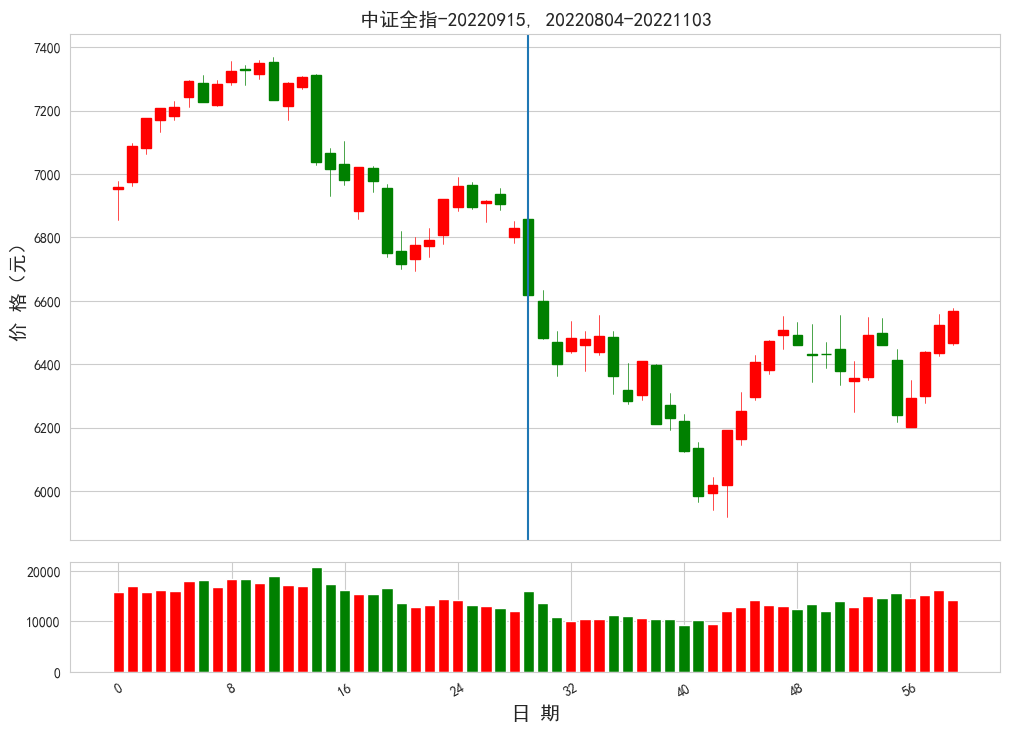

<Figure size 1200x1000 with 0 Axes>

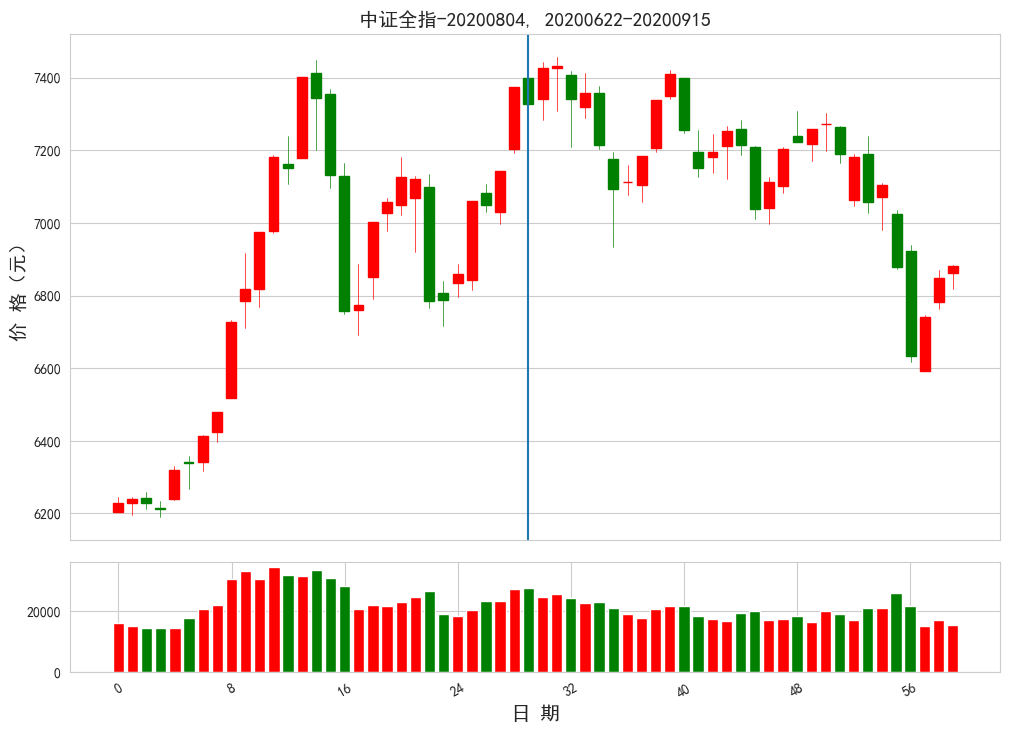

<Figure size 1200x1000 with 0 Axes>

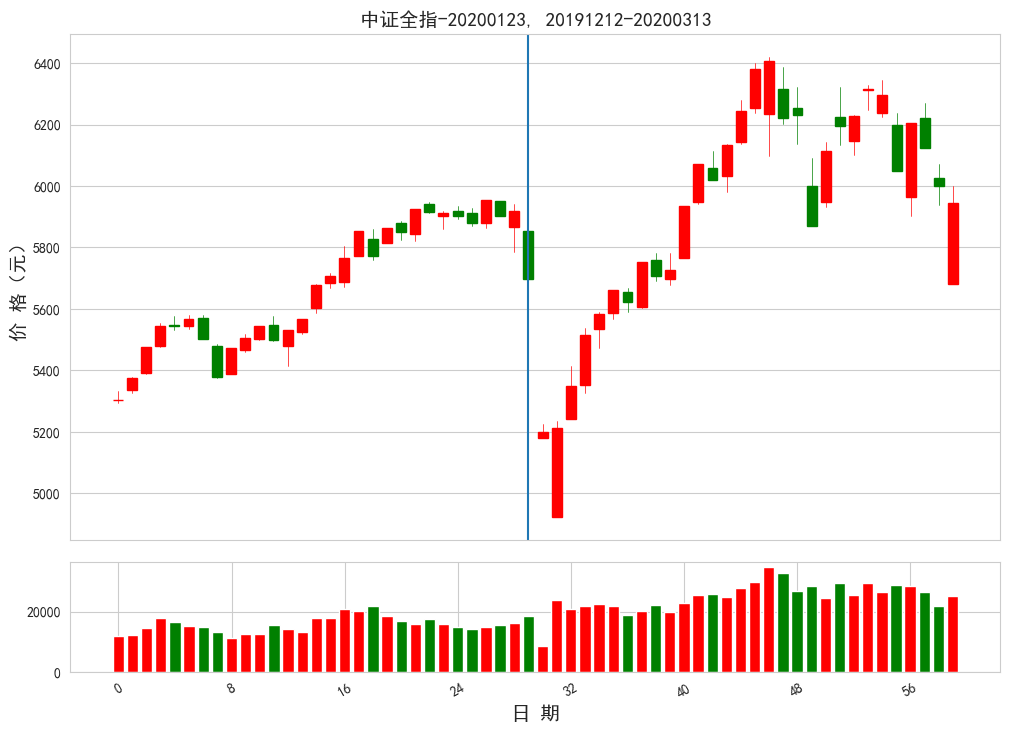

<Figure size 1200x1000 with 0 Axes>

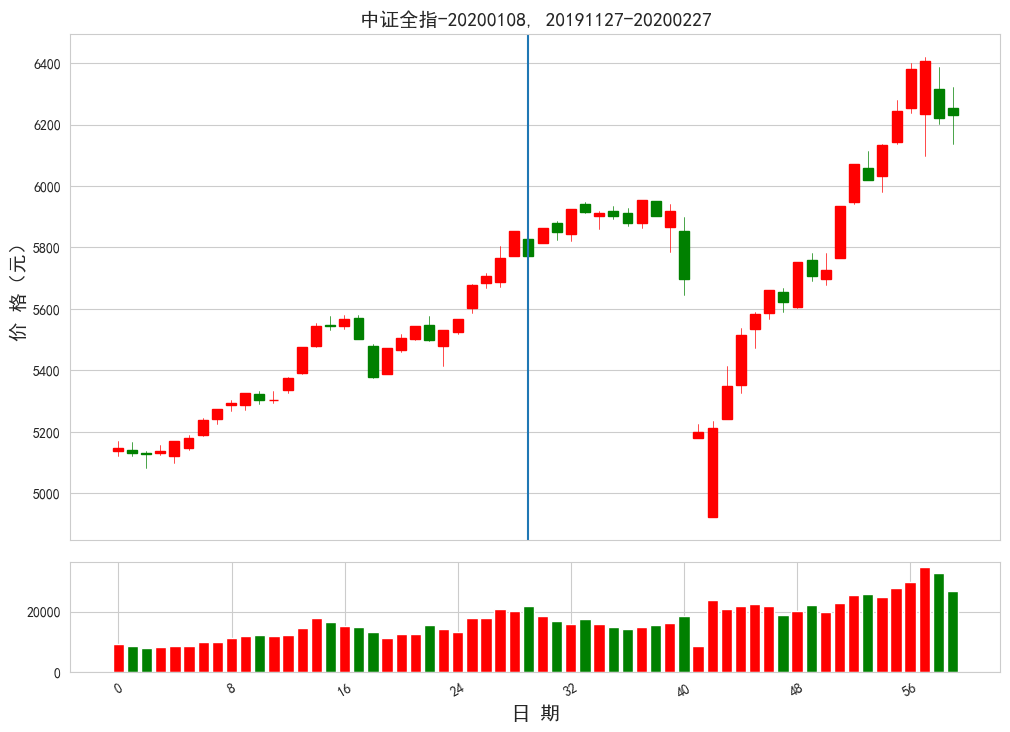

<Figure size 1200x1000 with 0 Axes>

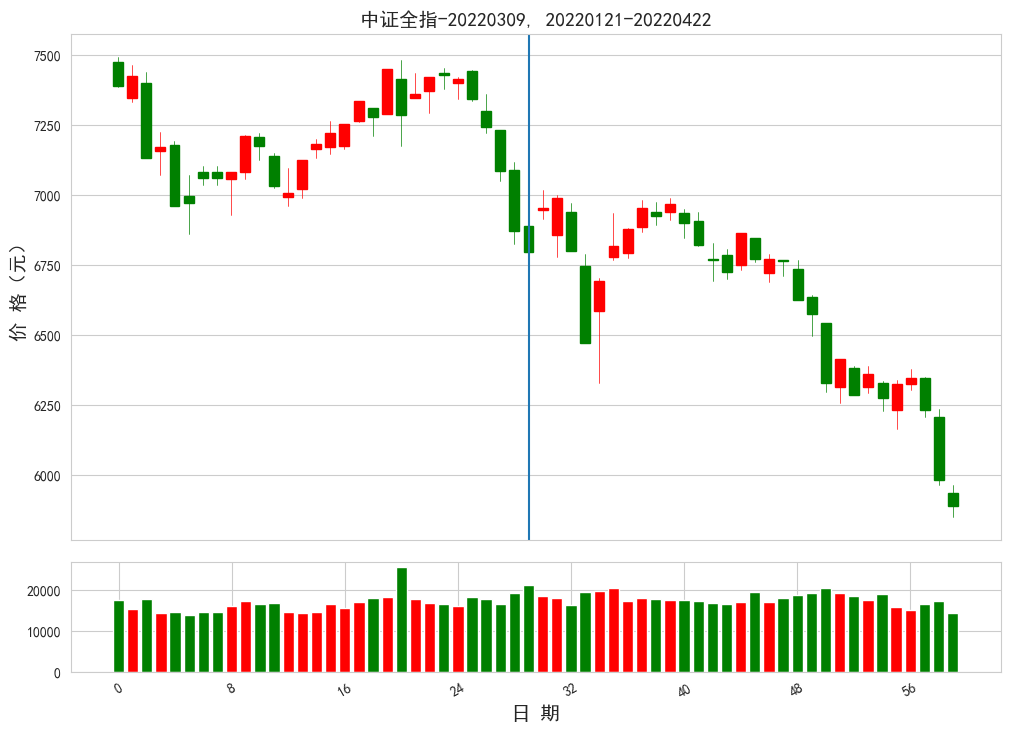

<Figure size 1200x1000 with 0 Axes>

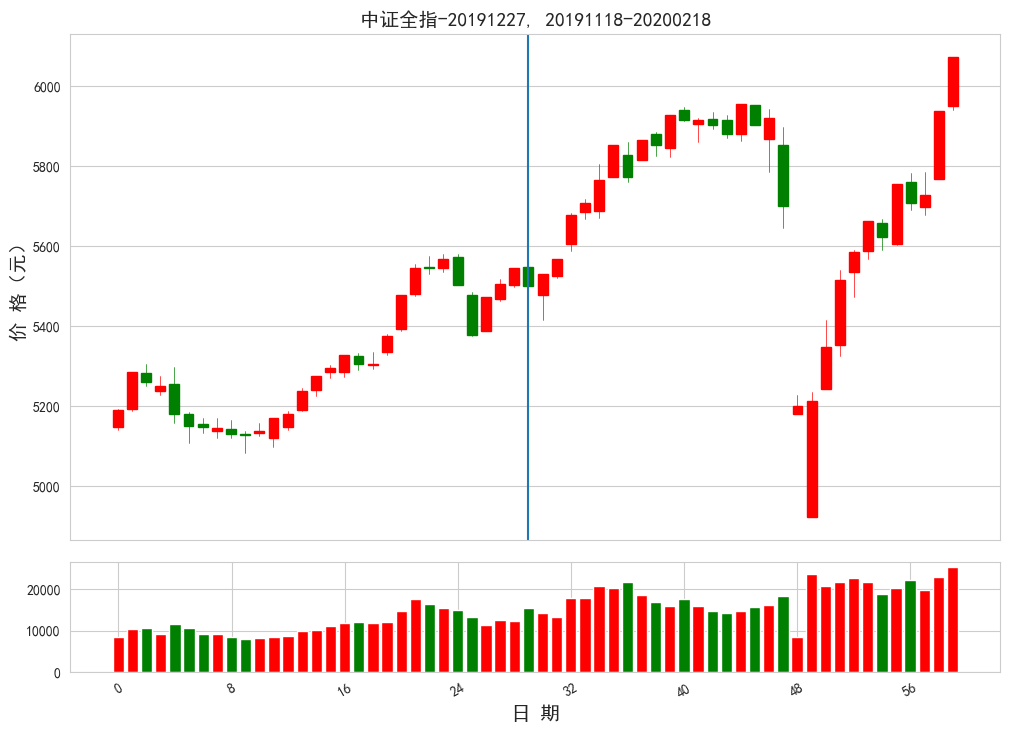

<Figure size 1200x1000 with 0 Axes>

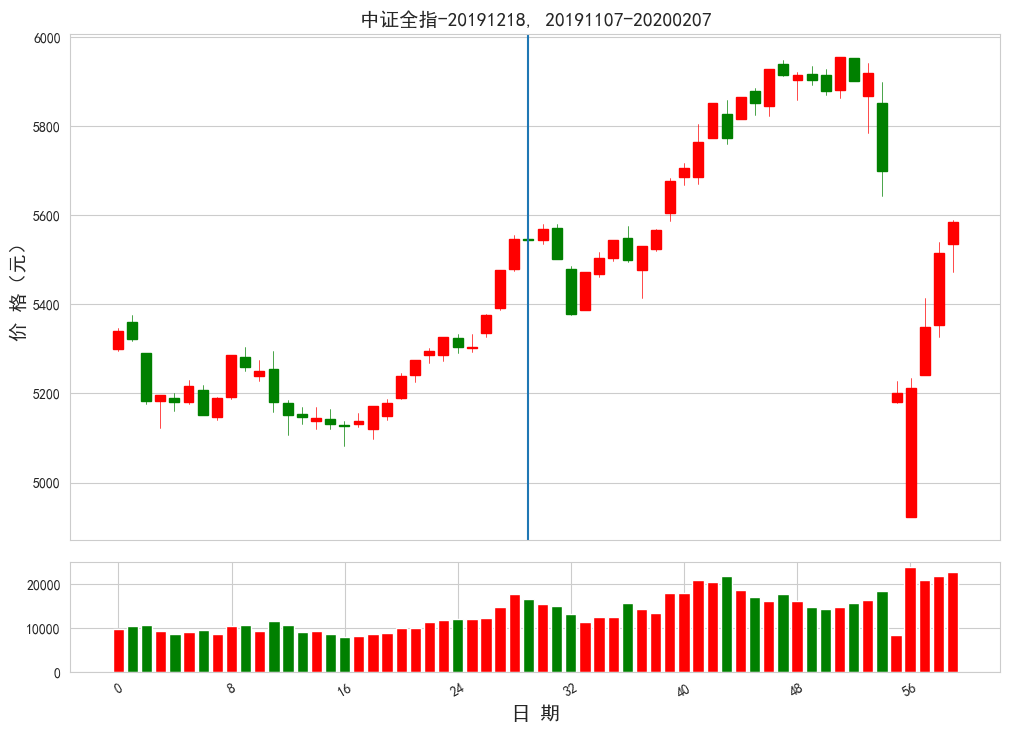

<Figure size 1200x1000 with 0 Axes>

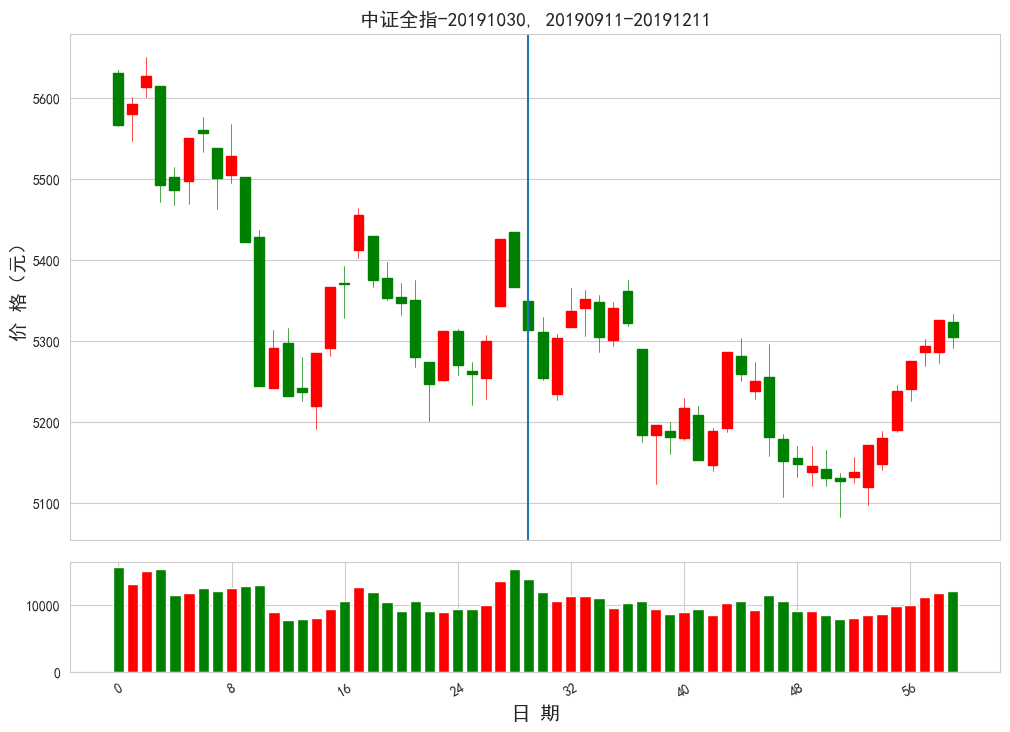

<Figure size 1200x1000 with 0 Axes>

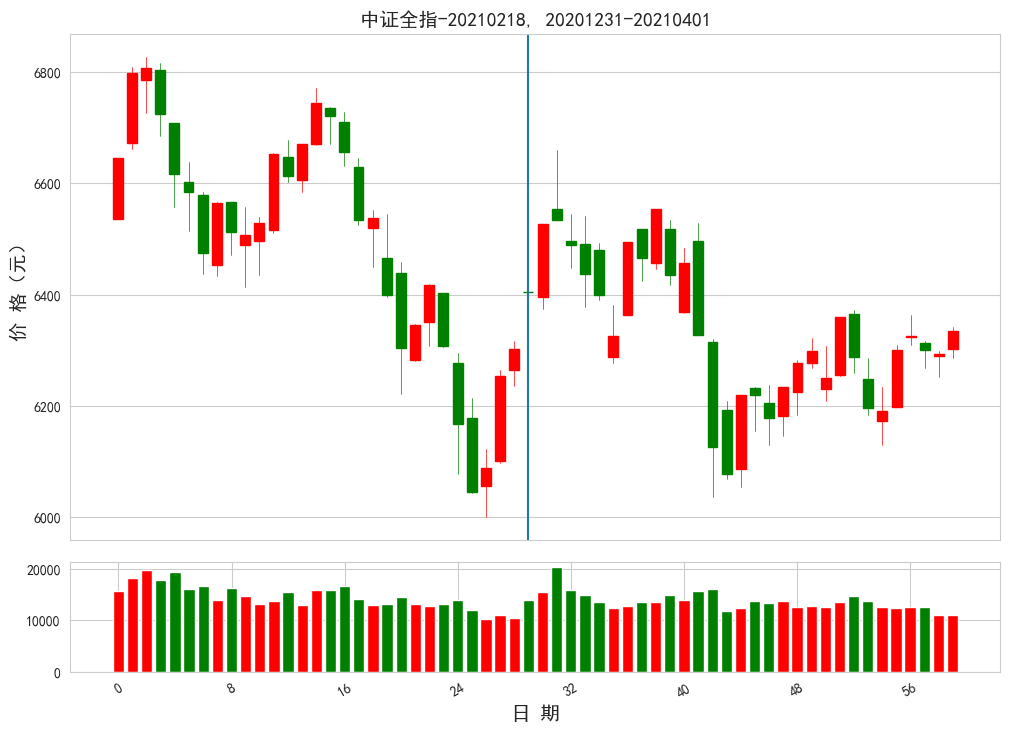

<Figure size 1200x1000 with 0 Axes>

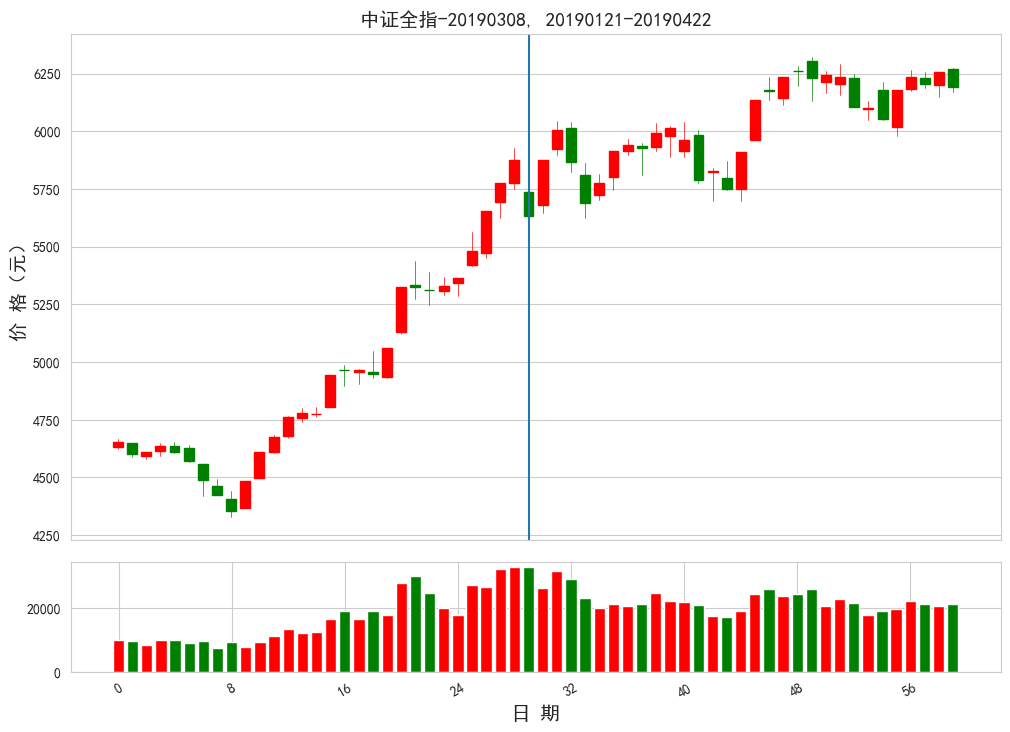

In [17]:
for label_date in data.head(30).index:
    # 数据
    plot_data = raw_data.set_index("日期").sort_index()
    plot_data = concat([plot_data.loc[:label_date].iloc[-30:], plot_data.loc[label_date:].iloc[1:31]])
    plot_data.reset_index(drop=False, inplace=True)

    # 图
    fig = pyplot.figure(figsize=(12, 10))
    grid = pyplot.GridSpec(12, 10, wspace=0.5, hspace=0.5)

    # （1）绘制K线图
    # K线数据
    ohlc = plot_data[['日期', '开盘', '最高', '最低', '收盘']]
    ohlc.loc[:, '日期'] = range(len(ohlc))  # 重新赋值横轴数据，绘制K线图无间隔

    # 5、绘制成交量
    fig = pyplot.figure(figsize=(12, 10))
    grid = pyplot.GridSpec(12, 10, wspace=0.5, hspace=0.5)

    # 绘制K线
    ax1 = fig.add_subplot(grid[0:8, 0:12])  # 设置K线图的尺寸
    candlestick_ohlc(ax1, ohlc.values.tolist(), width=.7, colorup='red', colordown='green')
    pyplot.title("{0}-{1}, {2}-{3}".format("中证全指", label_date.strftime("%Y%m%d"), plot_data["日期"][0].strftime("%Y%m%d"), plot_data["日期"].iloc[-1].strftime("%Y%m%d")), fontsize=14)  # 设置图片标题
    pyplot.ylabel('价 格（元）', fontsize=14)  # 设置纵轴标题
    ax1.set_xticks([])  # 日期标注在成交量中，故清空此处x轴刻度
    ax1.set_xticklabels([])  # 日期标注在成交量中，故清空此处x轴 
    pyplot.axvline(29)

    # （2）绘制成交量
    # 成交量数据
    data_volume = plot_data[['日期', '收盘', '开盘', '成交量']]
    data_volume['color'] = data_volume.apply(lambda row: 1 if row['收盘'] >= row['开盘'] else 0,
                                             axis=1)  # 计算成交量柱状图对应的颜色，使之与K线颜色一致
    data_volume["日期"] = ohlc["日期"]
    # 绘制成交量
    ax2 = fig.add_subplot(grid[8:10, 0:12])  # 设置成交量图形尺寸
    ax2.bar(data_volume.query('color==1')['日期'], data_volume.query('color==1')['成交量'], color='r')  # 绘制红色柱状图
    ax2.bar(data_volume.query('color==0')['日期'], data_volume.query('color==0')['成交量'], color='g')  # 绘制绿色柱状图
    pyplot.xticks(rotation=30)
    pyplot.xlabel('日 期', fontsize=14)  # 设置横轴标题
    # 修改横轴日期标注
    date_list = ohlc.index.tolist()  # 获取日期列表
    xticks_len = round(len(date_list) / (len(ax2.get_xticks()) - 1))  # 获取默认横轴标注的间隔
    xticks_num = range(0, len(date_list), xticks_len)  # 生成横轴标注位置列表
    xticks_str = list(map(lambda x: date_list[int(x)], xticks_num))  # 生成正在标注日期列表
    ax2.set_xticks(xticks_num)  # 设置横轴标注位置
    ax2.set_xticklabels(xticks_str)  # 设置横轴标注日期
    pyplot.show()